In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

#Climate Analysis

In [9]:
#pulling my data

from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine
from sqlalchemy import inspect

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


inspector = inspect(engine)
inspector.get_table_names()


measurement = inspector.get_columns('measurement')
for columns in measurement:
    print(columns['name'], columns['type'])

engine.execute("SELECT * FROM measurement LIMIT 1").fetchall()




id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0)]

In [16]:
station = inspector.get_columns('station')
for columns in station:
    print(columns['name'], columns['type'])

engine.execute("SELECT * FROM station LIMIT 2").fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)]

In [18]:

Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station

from sqlalchemy.orm import Session
session = Session(bind=engine)


In [20]:
import datetime
import pandas as pd

# Design a query to retrieve the last 12 months of precipitation data and plot the results
query = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > '2016-06-01').filter(Measurement.date < '2017-06-01' ).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query)
precipitation_df.head()

precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

precipitation_df = precipitation_df.set_index('date')
# Sort the dataframe by date
precipitation_df.sort_values(by='date').head()
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt


precipitation_df.plot(
    figsize = (30, 20),
    title = "Precipitation in Hawaii Results",
    grid = True,
    legend = True,
    fontsize = 16,
)

NameError: name 'measurment' is not defined

![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()

![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
query = session.query(Station.id).count()
print(f"There are totally {query} stations.")

There are totally 9 stations.


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import func, desc

query_station = session.query(Station.id, Station.name, func.count(Measurement.station)).\
                filter(Measurement.station == Station.station).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

query_station

[(7, 'WAIHEE 837.5, HI US', 2772),
 (1, 'WAIKIKI 717.2, HI US', 2724),
 (2, 'KANEOHE 838.1, HI US', 2709),
 (6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 (9, 'MANOA LYON ARBO 785.2, HI US', 2612),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 (4, 'PEARL CITY, HI US', 1372),
 (5, 'UPPER WAHIAWA 874.3, HI US', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query_temperature = session.query(Measurement.date, Measurement.tobs).\
             filter(Station.station == Measurement.station).\
             filter(Station.name == 'WAIHEE 837.5, HI US').\
             filter(Measurement.date > '2016-06-01').filter(Measurement.date < '2017-06-01' ).all()

query_temperature

[('2016-06-02', 67.0),
 ('2016-06-03', 68.0),
 ('2016-06-04', 65.0),
 ('2016-06-05', 70.0),
 ('2016-06-06', 72.0),
 ('2016-06-07', 74.0),
 ('2016-06-08', 73.0),
 ('2016-06-09', 71.0),
 ('2016-06-10', 75.0),
 ('2016-06-11', 72.0),
 ('2016-06-12', 75.0),
 ('2016-06-13', 76.0),
 ('2016-06-14', 75.0),
 ('2016-06-15', 76.0),
 ('2016-06-16', 75.0),
 ('2016-06-17', 71.0),
 ('2016-06-18', 75.0),
 ('2016-06-19', 75.0),
 ('2016-06-20', 72.0),
 ('2016-06-21', 72.0),
 ('2016-06-22', 75.0),
 ('2016-06-23', 73.0),
 ('2016-06-24', 76.0),
 ('2016-06-25', 74.0),
 ('2016-06-26', 77.0),
 ('2016-06-27', 72.0),
 ('2016-06-28', 71.0),
 ('2016-06-29', 76.0),
 ('2016-06-30', 77.0),
 ('2016-07-01', 76.0),
 ('2016-07-02', 79.0),
 ('2016-07-03', 76.0),
 ('2016-07-04', 79.0),
 ('2016-07-05', 75.0),
 ('2016-07-06', 74.0),
 ('2016-07-07', 73.0),
 ('2016-07-08', 78.0),
 ('2016-07-09', 80.0),
 ('2016-07-10', 72.0),
 ('2016-07-11', 79.0),
 ('2016-07-12', 80.0),
 ('2016-07-13', 76.0),
 ('2016-07-14', 80.0),
 ('2016-07-

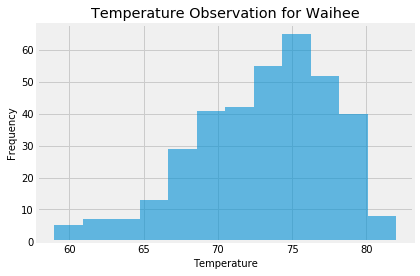

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = [temp[1] for temp in query_temperature]

plt.hist(temp, bins=12, alpha=0.6)               
plt.title("Temperature Observation for Waihee")
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Temperature', fontsize=10)
plt.show()